In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/preprocessed_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/preprocessed_data.csv'

In [ ]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


# **Train Test & Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X,y = df.drop('price', axis=1), df.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=48)

# **Random Forest Regressor**

In [ ]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

# **Matrics Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import math

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.985429959656714
MAE:  1079.7725287886806
MSE:  7517226.359010507
RMSE:  2741.7560721206596


# **Model Performance Visualizer**

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted Flight Prices')

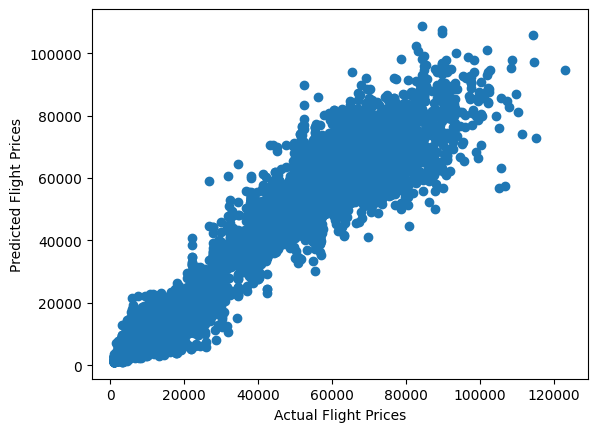

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Prices")
plt.ylabel("Predicted Flight Prices")

# **Feature Importances**

In [ ]:
# importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
# sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances = sorted(zip(reg.feature_names_in_, reg.feature_importances_), key=lambda x: x[1], reverse=True)

<BarContainer object of 5 artists>

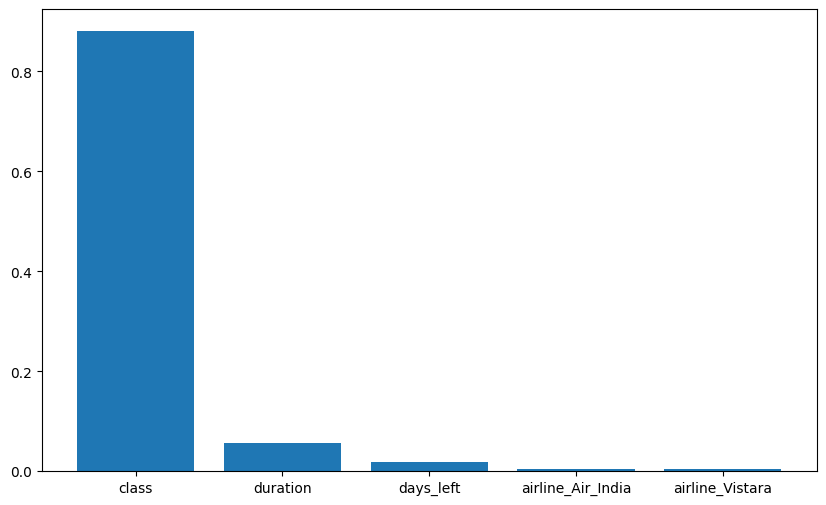

In [ ]:
plt.figure(figsize=(10,6))
plt.bar ([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

# **HyperParameter Tuning Using Randomized Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import scipy
from scipy.stats import randint



param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'sqrt', 'log2']  # Removed 'auto'
}


reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=2, scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1 )

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 2 folds for each of 2 candidates, totalling 4 fits


In [ ]:
best_regressor.score(X_test, y_test)

0.9863860290022437

In [ ]:
y_pred = best_regressor.predict(X_test)
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9863860290022437
MAE:  1091.4480164392398
MSE:  7023954.582411081
RMSE:  2650.274435301197


Text(0, 0.5, 'Predicted Flight Prices')

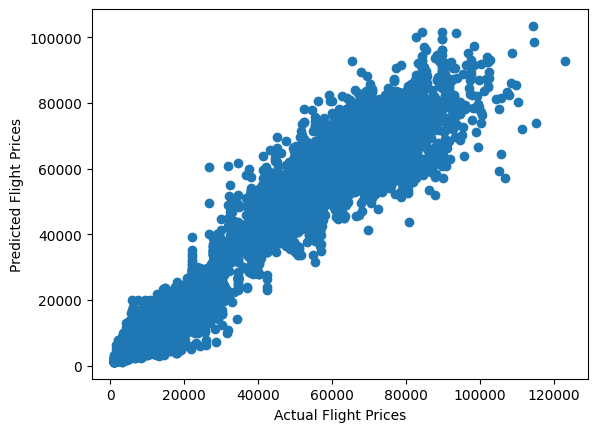

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Prices")
plt.ylabel("Predicted Flight Prices")